In [1]:
import numpy as np
from Corrfunc.theory import DD, DDrppi

In [3]:
particles = np.loadtxt('dm_xyz_snap_010_thin.dat')

In [5]:
rp_bins = np.geomspace(0.3, 100, 30)

In [6]:
particles.max()

2499.99976

In [7]:
dd = DDrppi(1, 40, 100, rp_bins, X1=particles[:,0], Y1=particles[:,1], Z1=particles[:,2], periodic=True, boxsize=2500, verbose=True)

In [4]:
particles

array([[ 238.42775 , 1870.24707 , 1001.93854 ],
       [1557.32532 ,  659.766357, 1477.79785 ],
       [ 481.374084, 1650.14783 , 1435.50452 ],
       ...,
       [ 915.008057, 1660.396   ,  842.512085],
       [2113.58008 ,  445.923798, 2027.09143 ],
       [2477.79102 ,  103.763184,  169.947464]])

In [9]:
boxsize = 2500
vol = np.pi*(dd['rmax']**2 - dd['rmin']**2)*1           # delta r pi = 1
NR = 1000_000_000
n = NR / (boxsize**3)
RR = dd.copy()
RR['npairs'] = (NR*vol*n*2).astype('uint64')            # this has been cross checked to be correct

In [11]:
from Corrfunc.utils import convert_rp_pi_counts_to_wp

In [12]:
ND = particles.shape[0]
DR = RR.copy()
DR['npairs'] = ND*vol*n*2
wp = convert_rp_pi_counts_to_wp(ND, ND, NR, NR, dd, DR, DR, RR, pimax=100, nrpbins=29)


In [14]:
import matplotlib.pyplot as plt

In [20]:
rp[17]

9.98959965632269

In [21]:
wp[17]

2.619458746554294

[]

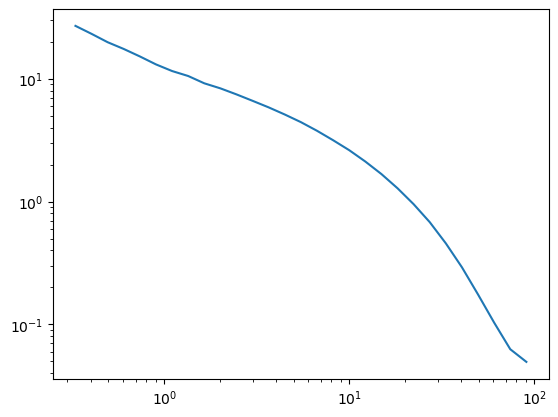

In [15]:
rp = (rp_bins[1:]*rp_bins[:-1])**0.5
plt.plot(rp, wp)
plt.loglog()